Проведём краткую предобработку в соответствии с базовым заданием и напомним себе основные выводы.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from scipy import stats

In [2]:
# Загрузка данных
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)
df = df.drop_duplicates()

In [3]:
# Краткое напоминание столбцов и их типов
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


None

Построение phik-корреляции привело к следующему выводу:

Диабет сильно коррелирует с уровнем глюкозы в крови, умеренно коррелирует с уровнем A1c гемоглобина и умеренно коррелирует с гипертонией и возрастом. Наблюдается слабая корреляция с наличием сердечных заболеваний, статусом курильщика и индексом массы тела. Корреляция с полом практически отсутствует.

Построение гистограмм и столбчатых диаграмм привело к следующим выводам:

1. Отсутствие корреляции диабета с полом подтверждается.
2. Визуально подтверждается корреляция диабета с возрастом, у диабетиков существенно выше средний возраст.
3. Визуально подтверждается корреляция диабета с bmi, у диабетиков bmi в целом выше.
4. Визуально подтверждается корреляция диабета с показателями глюкозы в крови и А1с гемоглобина, у диабетиков они в среднем выше.



## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

Мы видим, что диабетиков и недиабетиков можно разделить по сильно коррелирующим с таргетом показателям 'blood_glucose_level' и 'HbA1c_level'. Пропишем две интересующие нас маски mask_glucose и mask_Hb. Пациентов, не входящих в эти маски можно записывать в диабетики/недиабетики в зависимости от уровня этих показателей. Группа пациентов, удовлетворяющих этим маскам является самой важной и нетривиальной -- для них определение диабета гораздо менее очевидно.

In [4]:
print(f"Уровень HbA1c\
       у недиабетиков лежит между {df[df['diabetes'] == 0]['HbA1c_level'].min()} и {df[df['diabetes'] == 0]['HbA1c_level'].max()}")
print(f"Уровень HbA1c\
       у диабетиков лежит между {df[df['diabetes'] == 1]['HbA1c_level'].min()} и {df[df['diabetes'] == 1]['HbA1c_level'].max()}")

Уровень HbA1c       у недиабетиков лежит между 3.5 и 6.6
Уровень HbA1c       у диабетиков лежит между 5.7 и 9.0


In [5]:
print(f"Уровень глюкозы в крови \
       у недиабетиков лежит между {df[df['diabetes'] == 0]['blood_glucose_level'].min()} и {df[df['diabetes'] == 0]['blood_glucose_level'].max()}")
print(f"Уровень глюкозы в крови \
       у диабетиков лежит между {df[df['diabetes'] == 1]['blood_glucose_level'].min()} и {df[df['diabetes'] == 1]['blood_glucose_level'].max()}")

Уровень глюкозы в крови        у недиабетиков лежит между 80 и 200
Уровень глюкозы в крови        у диабетиков лежит между 126 и 300


In [6]:

mask_glucose = (df['blood_glucose_level'] > 120) & (df['blood_glucose_level'] < 210)
mask_Hb = (df['HbA1c_level'] > 5.5) &  (df['HbA1c_level'] < 6.8)

df_new = df[mask_glucose & mask_Hb]
df_new['diabetes'].value_counts(normalize=True)

diabetes
0    0.926717
1    0.073283
Name: proportion, dtype: float64

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


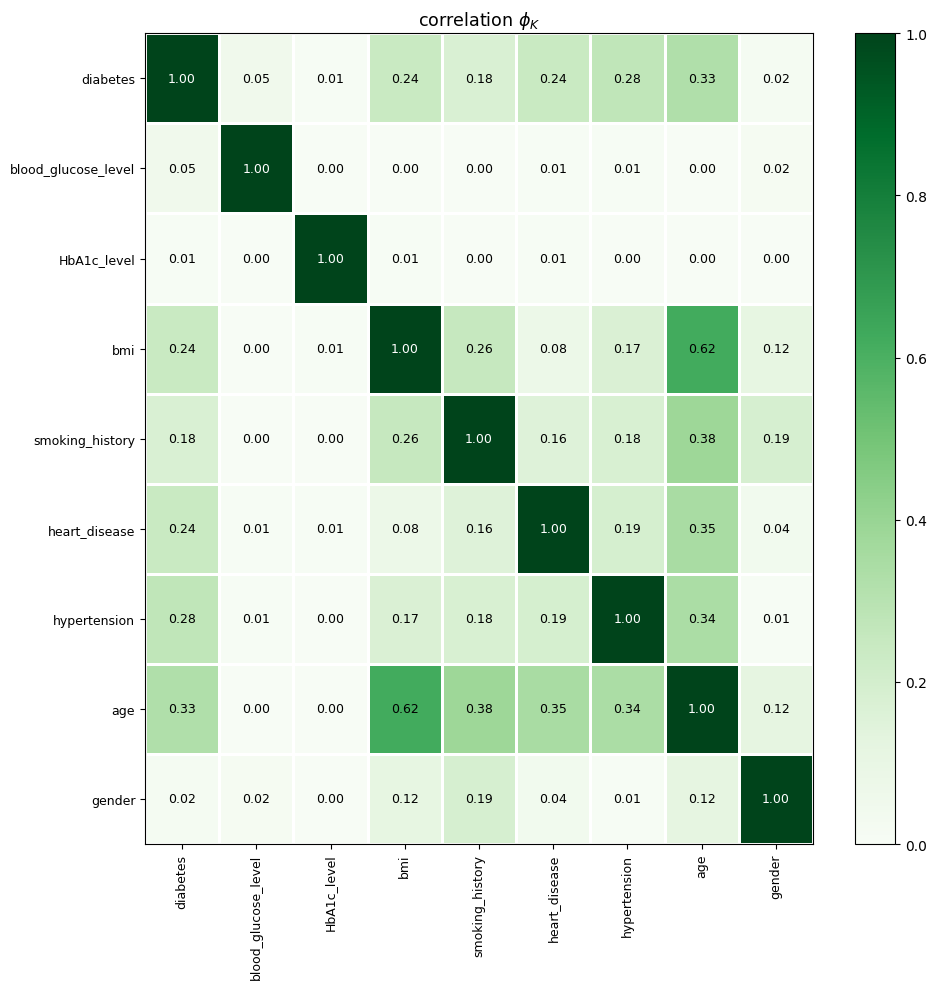

In [7]:
# Строим матрицу phik-корреляции

phik_overview = df_new.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(10, 10))
plt.tight_layout()

In [8]:
# Немного графиков

no_diabetes = df_new['diabetes'] == 0
yes_diabetes = df_new['diabetes'] == 1
df_no = df_new[no_diabetes]
df_yes = df_new[yes_diabetes]

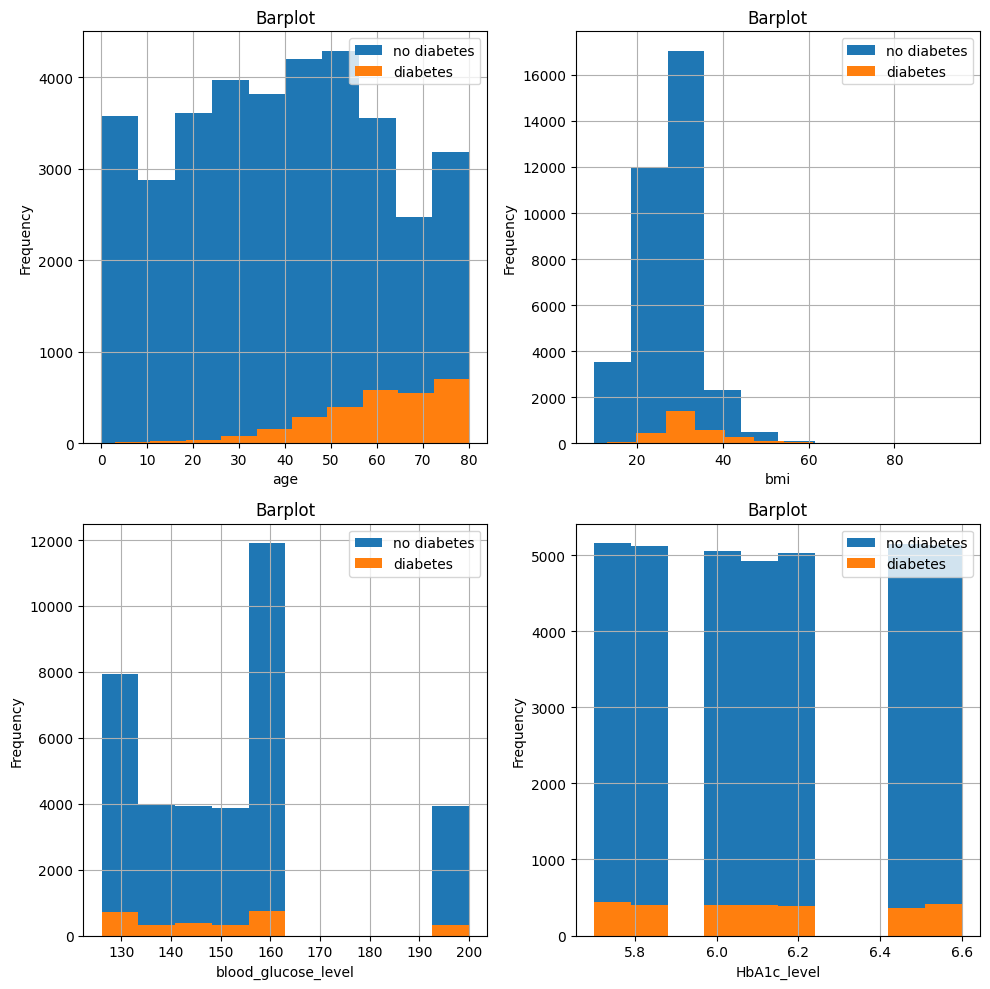

In [9]:
# Гистограммы

lst_of_numeric = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, param in enumerate(lst_of_numeric):
    axs[i].hist(df_no[param], label='no diabetes')
    axs[i].hist(df_yes[param], label='diabetes')
    axs[i].set_title('Barplot')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Frequency')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()


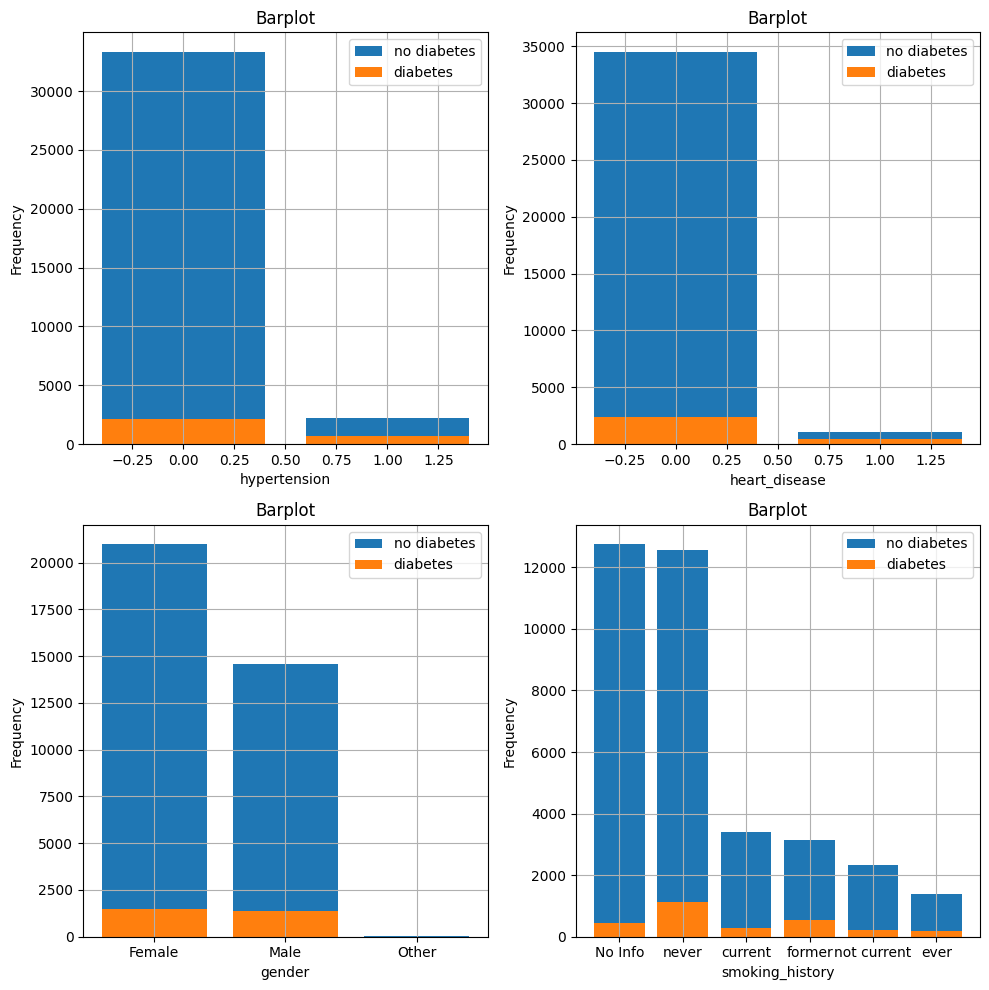

In [10]:
# Столбчатые диаграммы

bar_columns = ['hypertension', 'heart_disease', 'gender', 'smoking_history']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, param in enumerate(bar_columns):
    axs[i].bar(df_no[param].value_counts().index, height = df_no[param].value_counts().values, label='no diabetes')
    axs[i].bar(df_yes[param].value_counts().index, height = df_yes[param].value_counts().values, label='diabetes')
    axs[i].set_title('Barplot')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Frequency')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()

Из этих графиков явно видна только корреляция с возрастом, гипертонией и сердечными заболеваниями. Посмотрим на различные value_counts по этим параметрам и построим pairplots.

In [11]:
print('Диабет у пациентов с сердечными заболеваниями:')
display(df_new[df_new['heart_disease'] == 1]['diabetes'].value_counts(normalize=True))

print('Диабет у пациентов без сердечных заболеваний:')
display(df_new[df_new['heart_disease'] == 0]['diabetes'].value_counts(normalize=True))

Диабет у пациентов с сердечными заболеваниями:


diabetes
0    0.71978
1    0.28022
Name: proportion, dtype: float64

Диабет у пациентов без сердечных заболеваний:


diabetes
0    0.934882
1    0.065118
Name: proportion, dtype: float64

In [12]:
print('Диабет у пациентов с гипертонией:')
display(df_new[df_new['hypertension'] == 1]['diabetes'].value_counts(normalize=True))

print('Диабет у пациентов без гипертонии:')
display(df_new[df_new['hypertension'] == 0]['diabetes'].value_counts(normalize=True))

Диабет у пациентов с гипертонией:


diabetes
0    0.764524
1    0.235476
Name: proportion, dtype: float64

Диабет у пациентов без гипертонии:


diabetes
0    0.940027
1    0.059973
Name: proportion, dtype: float64

In [13]:
print('Диабет у пациентов с гипертонией и сердечными заболеваниями:')
display(df_new[(df_new['hypertension'] == 1) & (df_new['heart_disease'] == 1)]['diabetes'].value_counts(normalize=True))

print('Диабет у пациентов без гипертонии и сердечных заболеваний:')
display(df_new[(df_new['hypertension'] == 0) & (df_new['heart_disease'] == 0)]['diabetes'].value_counts(normalize=True))

Диабет у пациентов с гипертонией и сердечными заболеваниями:


diabetes
0    0.644886
1    0.355114
Name: proportion, dtype: float64

Диабет у пациентов без гипертонии и сердечных заболеваний:


diabetes
0    0.946339
1    0.053661
Name: proportion, dtype: float64

In [14]:
print('Диабет у мужчин:')
display(df_new[df_new['gender'] == 'Male']['diabetes'].value_counts(normalize=True))

print('Диабет у пациентов без гипертонии:')
display(df_new[df_new['gender'] == 'Female']['diabetes'].value_counts(normalize=True))

Диабет у мужчин:


diabetes
0    0.915106
1    0.084894
Name: proportion, dtype: float64

Диабет у пациентов без гипертонии:


diabetes
0    0.934929
1    0.065071
Name: proportion, dtype: float64

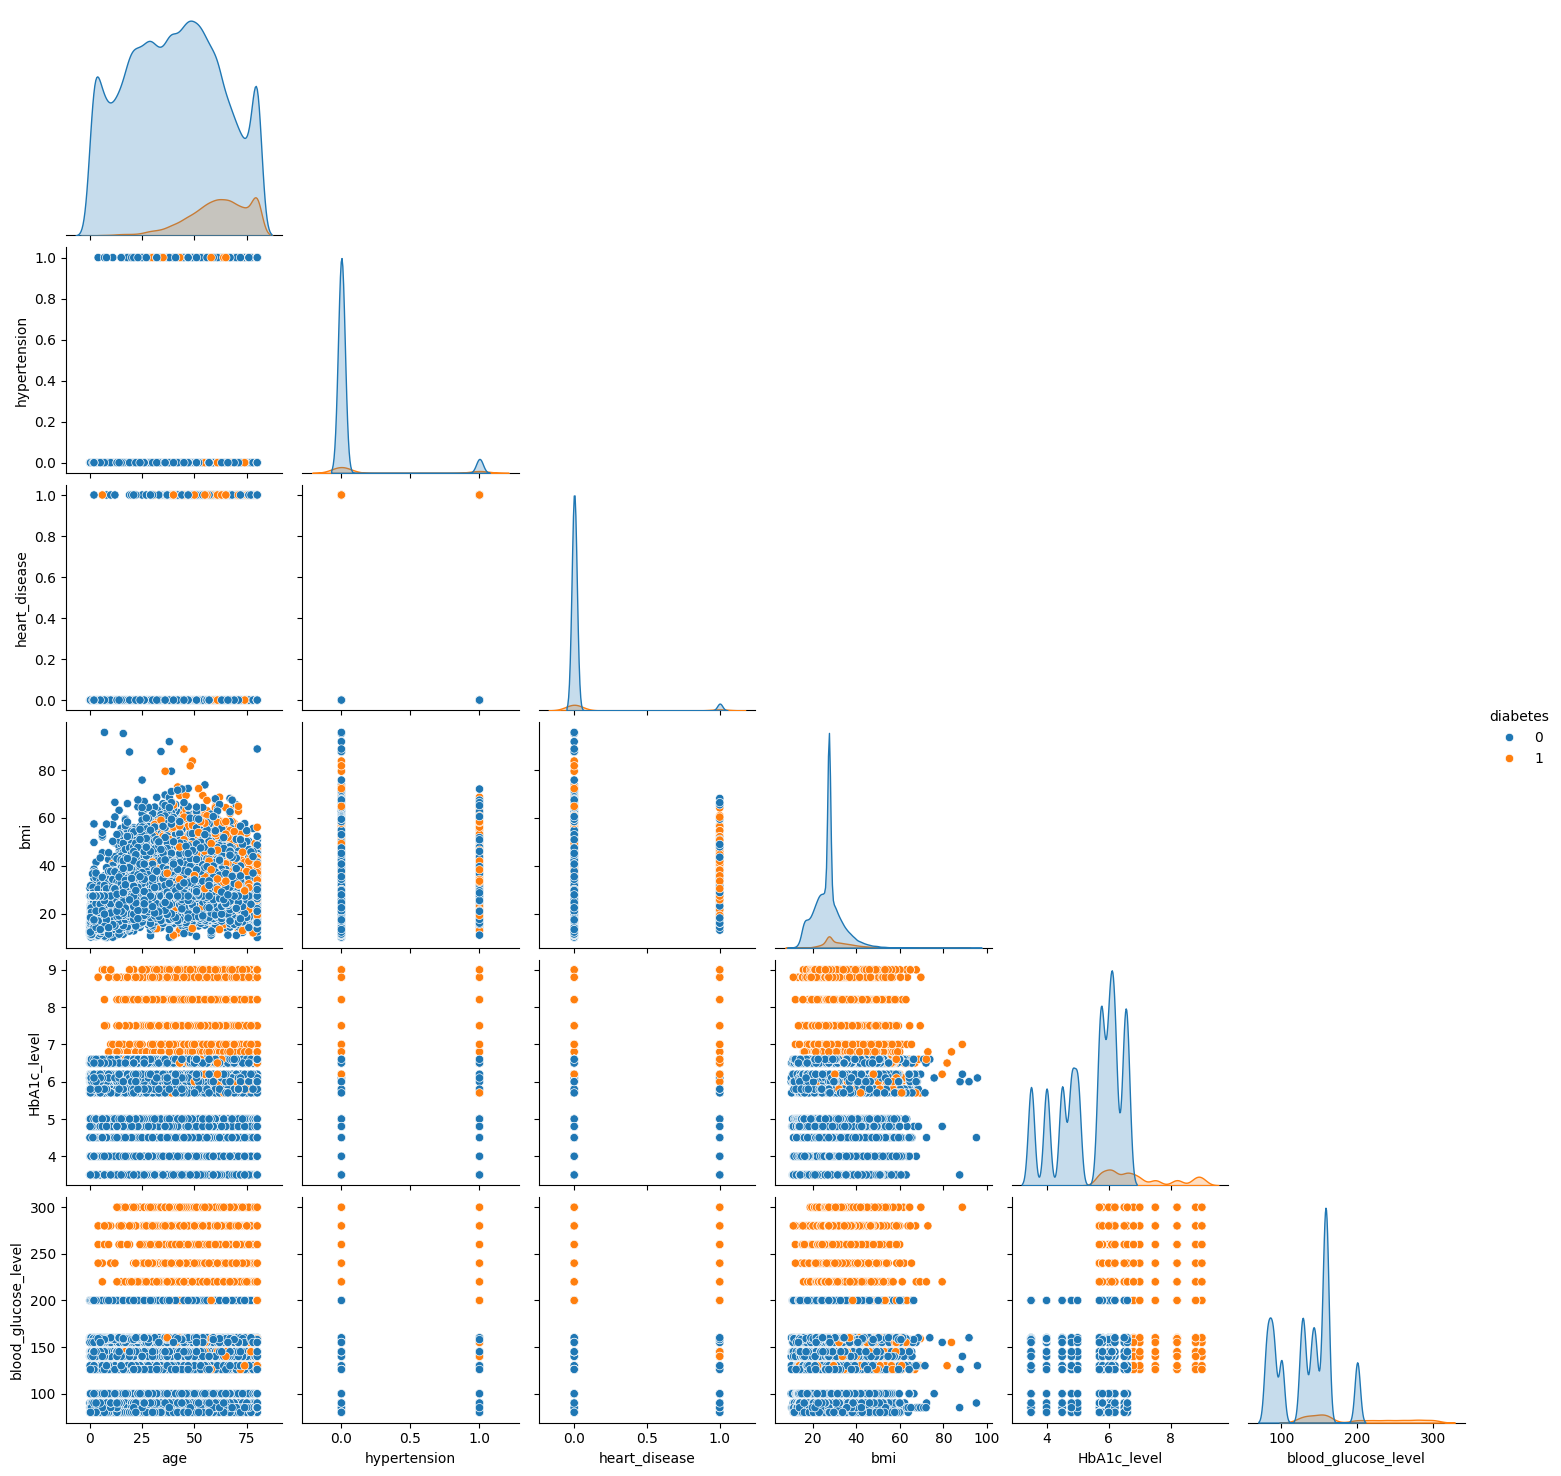

In [15]:
# Данный pairplot подтверждает обоснованность нашего разбиения по параметрам glucose и Hb

sns.pairplot(df, corner=True, hue = 'diabetes');

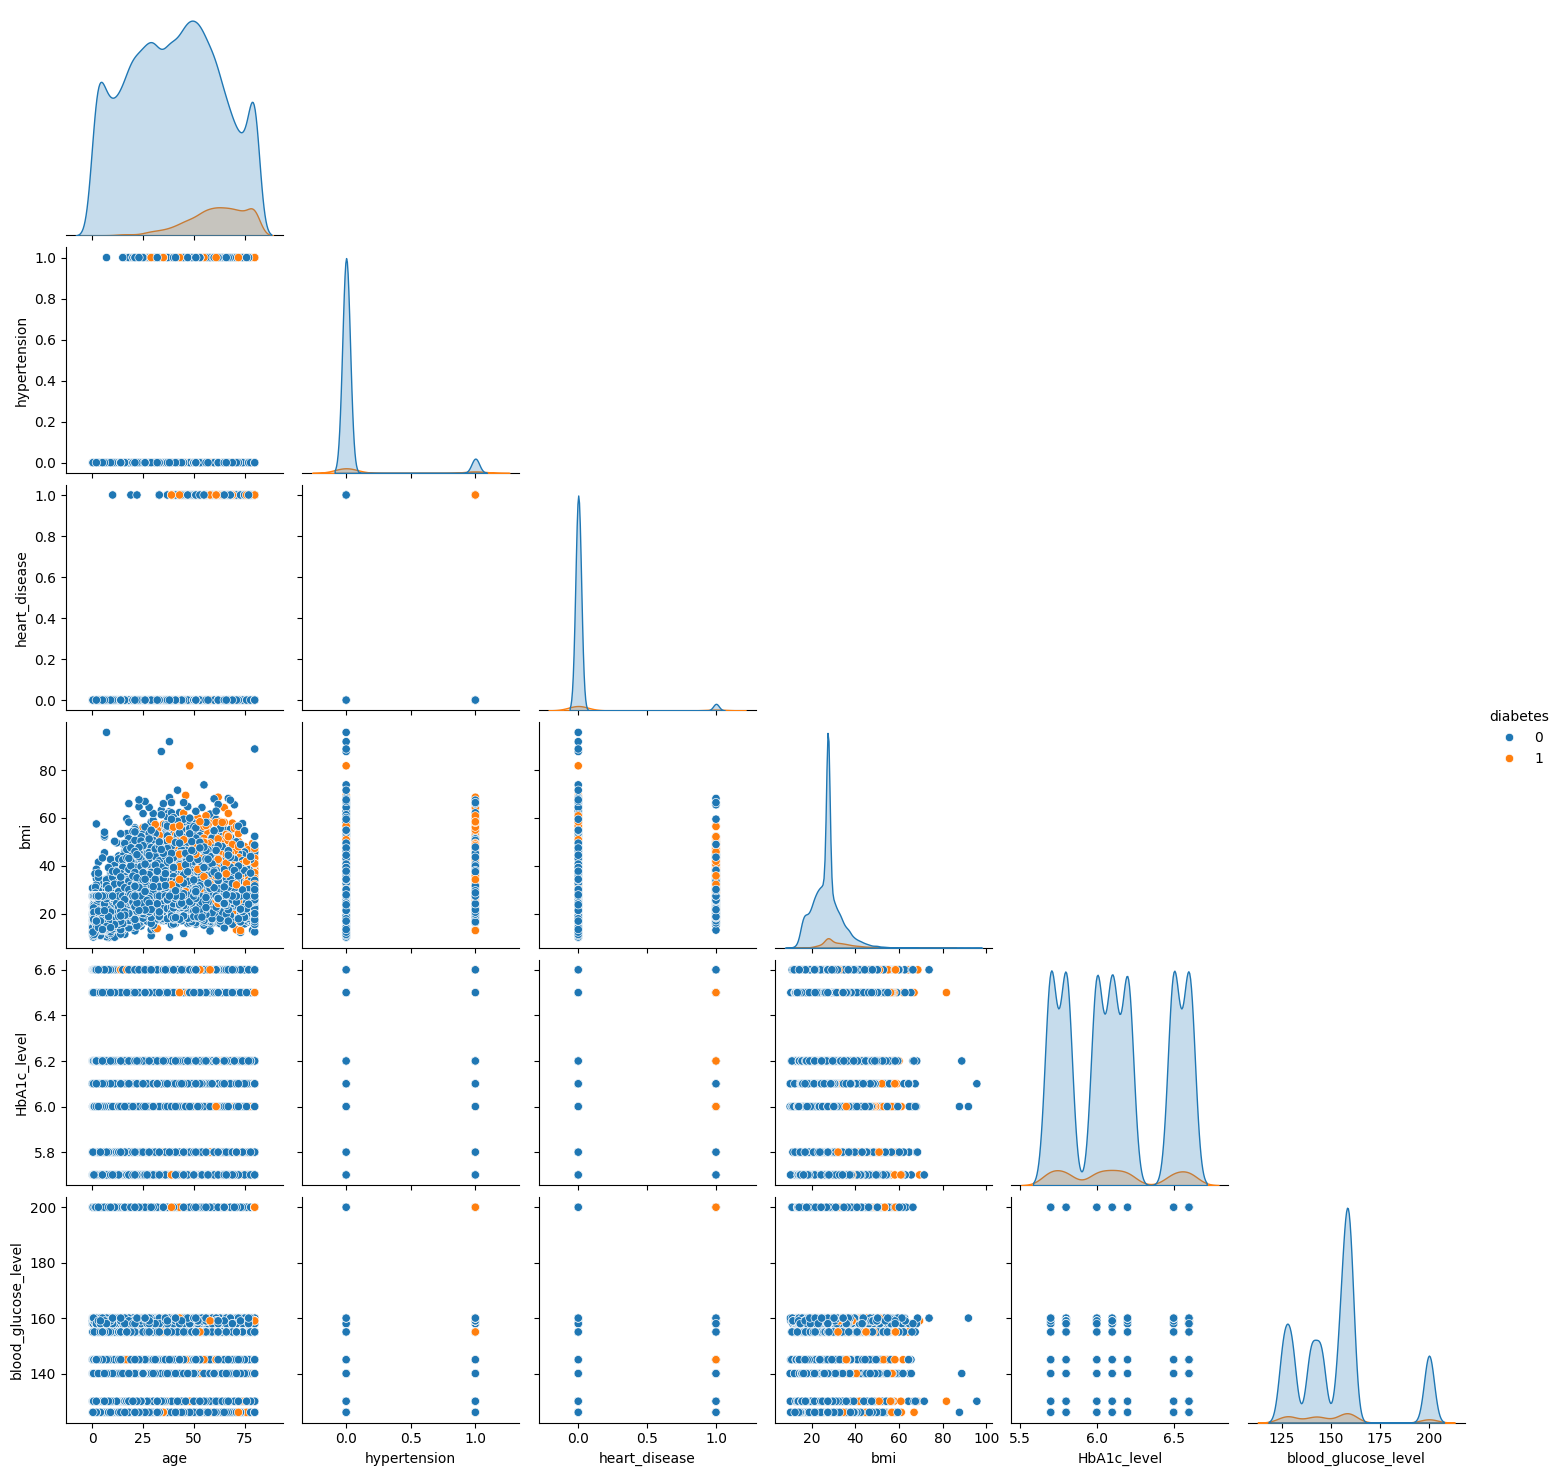

In [16]:
sns.pairplot(df_new, corner=True, hue = 'diabetes');

Итоговые выводы, которые мы можем сделать:

1. Пациенты с с 'blood_glucose_level' < 120 или 'HbA1c_level' < 5.5 с вероятностью близкой к 100% не больны диабетом. <br>
2. Пациенты с с 'blood_glucose_level' > 210 или 'HbA1c_level' > 6.8 с вероятностью близкой к 100% больны диабетом.

Критерий 1 позволяет отсеять ~ 60% людей не больных диабетом; <br>
Критерий 2 позволяет отсеять ~ 62% людей больных диабетом. <br>

После данного этапа на вероятность диабета влияют три ключевых фактора -- наличие гипертонии, сердечных заболеваний и возраст. Мы можем сказать следующее:

1. Все эти три фактора коррелируют между собой (что логично ожидать, поскольку с увеличением возраста увеличиваются вероятности наличия различных болезней, в том числе сердечных и гипертонии); <br>

2. Распределение диабетиков по возрастным группам (от общего числа наблюдений в соответствующей возрастной группе):

Диабет в возрастной группе 0 -- 30: 0.928% <br>
Диабет в возрастной группе 30 -- 50: 5.549% <br>
Диабет в возрастной группе 50+: 17.648% <br>


3. Если у пациента нет гипертонии, он здоров с вероятностью 94%, если нет сердечных заболеваний, то с вероятностью 93% (считая нашу выборку репрезентативной); 

4. Если у пациента есть гипертония, риск диабета повышается до 24%, если есть сердечные заболевания, то до 28%. Если у пациента есть и сердечные заболевания и гипертония, риск повышается до 36%;

5. Мужчины в среднем чаще болеют диабетом, однако в открытых источниках это зависит от типа диабета, который в нашем датасете не прописан.


In [17]:
display(df[(df['blood_glucose_level'] < 120) | (df['HbA1c_level'] < 5.5)]['diabetes'].value_counts())
df[(df['blood_glucose_level'] < 120) | (df['HbA1c_level'] < 5.5)].shape[0]/df[df['diabetes'] == 0].shape[0]

display(df[(df['blood_glucose_level'] > 210) | (df['HbA1c_level'] > 6.8)]['diabetes'].value_counts())
df[(df['blood_glucose_level'] > 210) | (df['HbA1c_level'] > 6.8)]['diabetes'].shape[0]/df[df['diabetes'] == 1].shape[0]

diabetes
0    52117
Name: count, dtype: int64

diabetes
1    5276
Name: count, dtype: int64

0.6220231077576044

In [18]:
print(f"Диабет в возрастной группе 0 -- 30: {(100*df[(df['age'] <= 30) & (df['diabetes'] == 1)].shape[0]/df[(df['age'] <= 30)].shape[0]):.3f}%")
print(f"Диабет в возрастной группе 30 -- 50: {(100*df[(df['age'] > 30) & (df['age'] < 50) &(df['diabetes'] == 1)].shape[0]/df[(df['age'] < 50) & (df['age'] > 30)].shape[0]):.3f}%")
print(f"Диабет в возрастной группе 50+: {(100*df[(df['age'] >= 50) & (df['diabetes'] == 1)].shape[0]/df[(df['age'] >= 50)].shape[0]):.3f}%")

Диабет в возрастной группе 0 -- 30: 0.928%
Диабет в возрастной группе 30 -- 50: 5.549%
Диабет в возрастной группе 50+: 17.648%
